Enter the angle :- 60


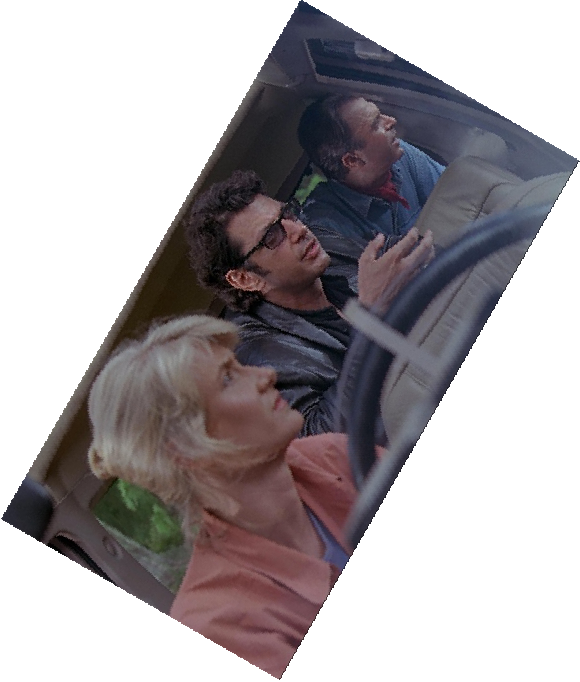

In [3]:
import numpy as np
from PIL import Image
import math


def shear(angle,x,y):
    '''
    |1  -tan(𝜃/2) |  |1        0|  |1  -tan(𝜃/2) | 
    |0      1     |  |sin(𝜃)   1|  |0      1     |
    '''
    # shear 1
    tangent=math.tan(angle/2)
    new_x=round(x-y*tangent)
    new_y=y
    
    #shear 2
    new_y=round(new_x*math.sin(angle)+new_y)      #since there is no change in new_x according to the shear matrix

    #shear 3
    new_x=round(new_x-new_y*tangent)              #since there is no change in new_y according to the shear matrix
    
    return new_y,new_x




image = np.array(Image.open("rotate.png"))             # Load the image
angle=-int(input("Enter the angle :- "))                # Ask the user to enter the angle of rotation

# Define the most occuring variables
angle=math.radians(angle)                               #converting degrees to radians
cosine=math.cos(angle)
sine=math.sin(angle)

height=image.shape[0]                                   #define the height of the image
width=image.shape[1]                                    #define the width of the image

# Define the height and width of the new image that is to be formed
new_height  = round(abs(image.shape[0]*cosine)+abs(image.shape[1]*sine))+1
new_width  = round(abs(image.shape[1]*cosine)+abs(image.shape[0]*sine))+1

# define another image variable of dimensions of new_height and new _column filled with zeros
output=np.zeros((new_height,new_width,image.shape[2]))
image_copy=output.copy()


# Find the centre of the image about which we have to rotate the image
original_centre_height   = round(((image.shape[0]+1)/2)-1)    #with respect to the original image
original_centre_width    = round(((image.shape[1]+1)/2)-1)    #with respect to the original image

# Find the centre of the new image that will be obtained
new_centre_height= round(((new_height+1)/2)-1)        #with respect to the new image
new_centre_width= round(((new_width+1)/2)-1)          #with respect to the new image


for i in range(height):
    for j in range(width):
        #co-ordinates of pixel with respect to the centre of original image
        y=image.shape[0]-1-i-original_centre_height                   
        x=image.shape[1]-1-j-original_centre_width 

        #Applying shear Transformation                     
        new_y,new_x=shear(angle,x,y)

        '''since image will be rotated the centre will change too, 
            so to adust to that we will need to change new_x and new_y with respect to the new centre'''
        new_y=new_centre_height-new_y
        new_x=new_centre_width-new_x
        
        output[new_y,new_x,:]=image[i,j,:]                          #writing the pixels to the new destination in the output image


pil_img=Image.fromarray((output).astype(np.uint8))  
pil_img.save("rotated_image_new.png")
# converting array to image
#pil_img.save("rotated_image.png") 
Image.open("rotated_image_new.png")